In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import joblib
import time

from module import MlfcsTrainer
import metrics
mypalette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#7f7f7f','#bcbd22','#17becf']
palette2 = ['#719b78','#6a73a4','#bc8977']
palette3 = ['#ffffff','#bc8977','#719b78','#6a73a4']

In [2]:

#Load a pre computed test
df = pd.read_pickle('../dat/result_test_RWF_long.pk').reset_index(drop=True)

In [16]:
#print(filtered_df.head())
thresh = 0.2
print(np.mean(filtered_df.loc[filtered_df['D']>10,'alpha_error']))

nan


[2.]


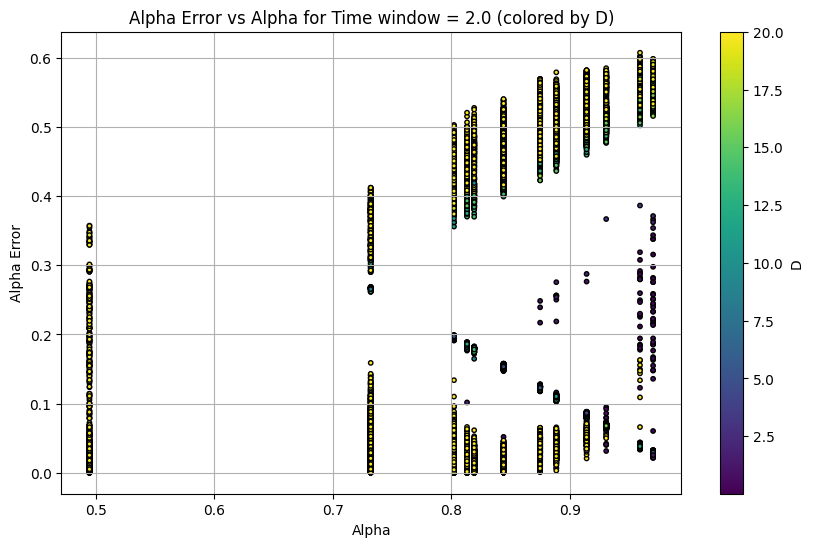

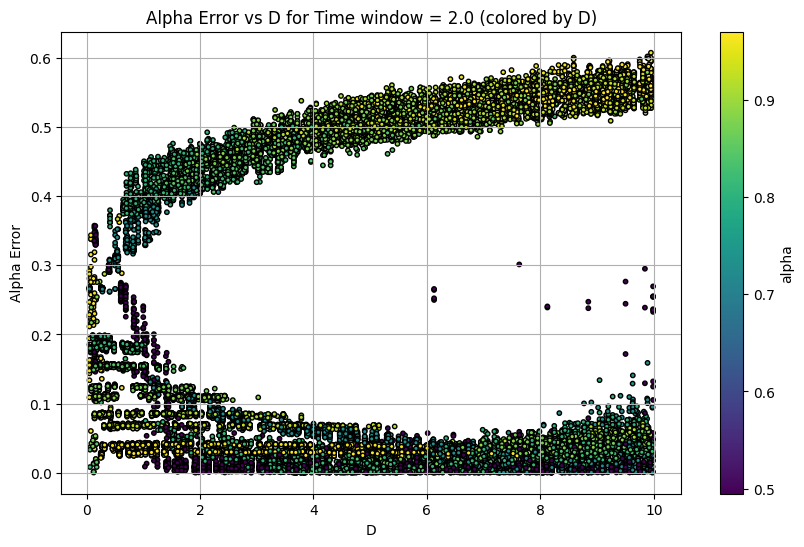

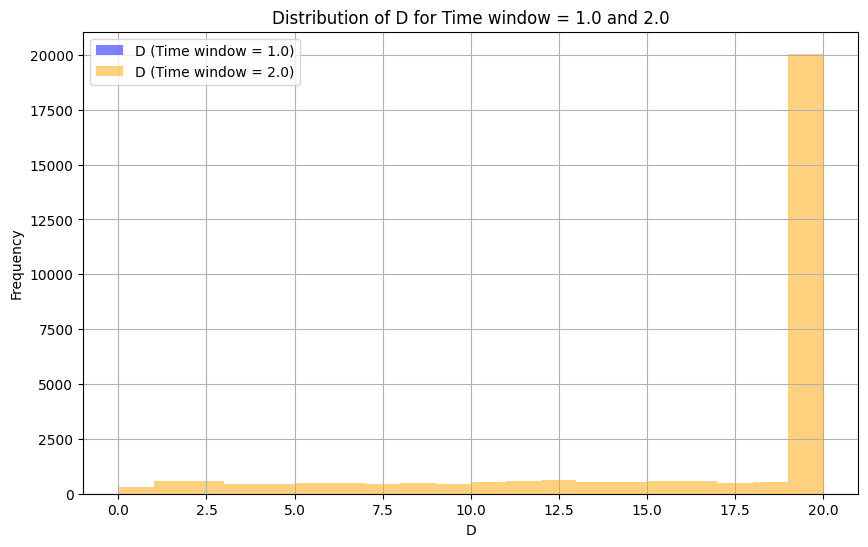

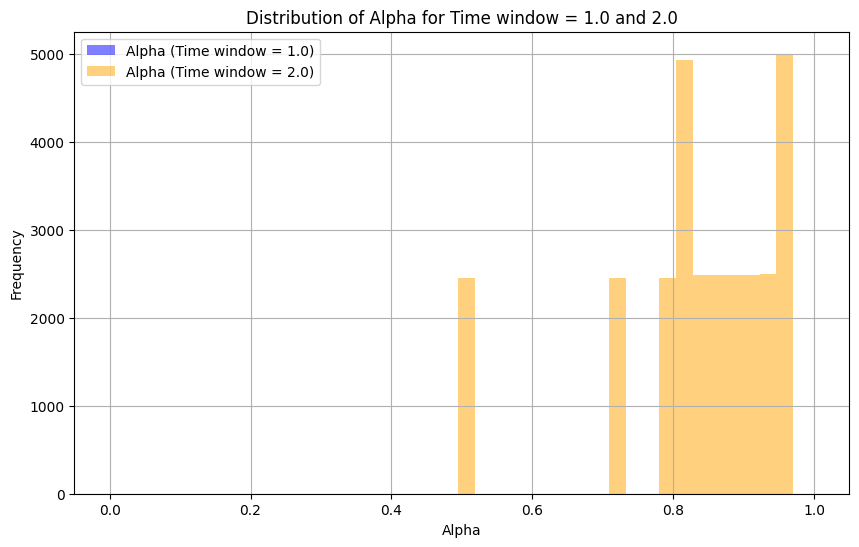

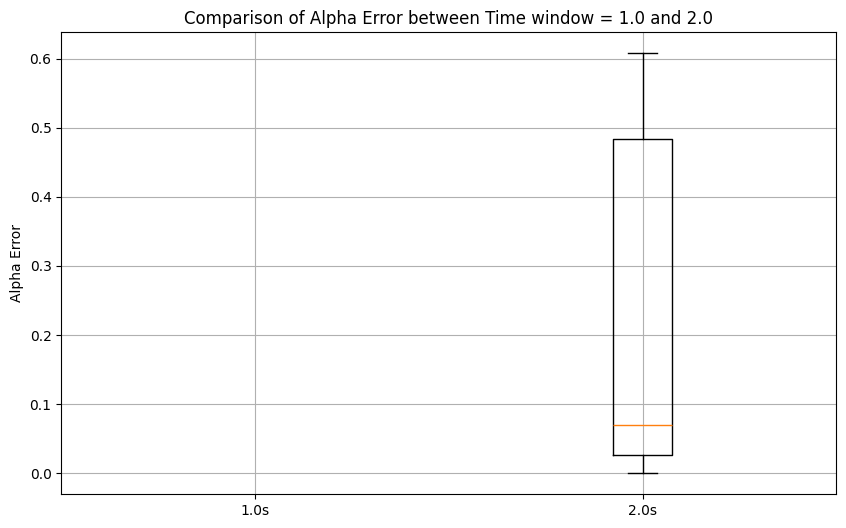

In [13]:
# Analyse des erreurs pour le modèle RWF avec Time windows 1.0 et 2.0
print(np.unique(df.loc[df['Model'] == 'RWF','Time window']))

# Filtrer les données pour Model = 'RWF' et Time window = 1.0 ou 2.0
filtered_df = df[(df['Model'] == 'RWF') & (df['Time window'].isin([1.0, 2.0]))]


# Créer une colonne pour l'erreur entre alpha et alpha_pred
filtered_df['alpha_error'] = abs(filtered_df['alpha'] - filtered_df['alpha pred'])

# Séparer les données en fonction de la Time window
data_1s = filtered_df[filtered_df['Time window'] == 1]
data_2s = filtered_df[filtered_df['Time window'] == 2]

# Visualisation des erreurs alpha en fonction de alpha pour Time window = 2.0
plt.figure(figsize=(10, 6))
plt.scatter(data_2s['alpha'], data_2s['alpha_error'], c=data_2s['D fit'], cmap='viridis', s=10, edgecolor='k')
plt.colorbar(label='D')
plt.xlabel('Alpha')
plt.ylabel('Alpha Error')
plt.title('Alpha Error vs Alpha for Time window = 2.0 (colored by D)')
plt.grid(True)
plt.show()

# Visualisation des erreurs alpha en fonction de D pour Time window = 2.0
plt.figure(figsize=(10, 6))
plt.scatter(data_2s['D'], data_2s['alpha_error'], c=data_2s['alpha'], cmap='viridis', s=10, edgecolor='k')
plt.colorbar(label='alpha')
plt.xlabel('D')
plt.ylabel('Alpha Error')
plt.title('Alpha Error vs D for Time window = 2.0 (colored by D)')
plt.grid(True)
plt.show()

# Distribution de D pour Time window = 1.0 et 2.0
plt.figure(figsize=(10, 6))
plt.hist(data_1s['D fit'], bins=20, alpha=0.5, label='D (Time window = 1.0)', color='blue')
plt.hist(data_2s['D fit'], bins=20, alpha=0.5, label='D (Time window = 2.0)', color='orange')
plt.xlabel('D')
plt.ylabel('Frequency')
plt.title('Distribution of D for Time window = 1.0 and 2.0')
plt.legend()
plt.grid(True)
plt.show()

# Distribution de alpha pour Time window = 1.0 et 2.0
plt.figure(figsize=(10, 6))
plt.hist(data_1s['alpha'], bins=20, alpha=0.5, label='Alpha (Time window = 1.0)', color='blue')
plt.hist(data_2s['alpha'], bins=20, alpha=0.5, label='Alpha (Time window = 2.0)', color='orange')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.title('Distribution of Alpha for Time window = 1.0 and 2.0')
plt.legend()
plt.grid(True)
plt.show()

# Comparaison des erreurs alpha entre Time window = 1.0 et 2.0
plt.figure(figsize=(10, 6))
plt.boxplot([data_1s['alpha_error'], data_2s['alpha_error']], labels=['1.0s', '2.0s'])
plt.ylabel('Alpha Error')
plt.title('Comparison of Alpha Error between Time window = 1.0 and 2.0')
plt.grid(True)
plt.show()
